In [1]:
# basic
import pandas as pd
import numpy as np 
import json 
from myfunct import *
import pickle
import seaborn as sns

# gensim 
# Topic modeling core library 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import TfidfModel
# Spacy 
# mostly for tokenizing 
import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction import text

# pyLDAvis
# LDA visualizations
import pyLDAvis
import pyLDAvis.gensim_models
import warnings

import dataframe_image as dfi
import matplotlib.pyplot as plt
# supress warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

# import glob

In [2]:
from IPython.display import IFrame
IFrame('../assets/simplex.html', 500, 500)

In [3]:
# pyLDAvis causes issues with the jupyter lab CSS Stylesheet. to avoid issues run this code
from IPython.display import HTML
css_str = '<style> \
.jp-icon-warn0 path {fill: var(--jp-warn-color0);} \
.bp3-button-text path { fill: var(--jp-inverse-layout-color3);} \
.jp-icon-brand0 path { fill: var(--jp-brand-color0);} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str))

# Resources 
___
___
The following resources were pivitol in introducing myself to LDA topic modeling. 

In [4]:
# https://www.youtube.com/watch?v=xADAr8pPQMI&list=PL2VXyKi-KpYttggRATQVmgFcQst3z6OlX&index=12&t=5s
#https://www.youtube.com/watch?v=TKjjlp5_r7o
# https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
# https://medium.com/@patrickhk/build-a-lda-model-for-classification-with-gensim-80ca6343c4b9

___
___
# Table of Contents


1. [The Data](#TheData)
2. [Preprocessing](#example2)
3. [TFIDF](#third-example)
4. [ID2word](#fourth-example)
5. [Hyper-parameter Tunning](#)
6. [Visualizing Model Training](#)
7. [Inspecting Topic Models](#)
8. [Label Dataset](#)

................................................................................................................................

___
___
# 1.  The Data
___
___

>Read in data-frame

>Select just the text. 

In [5]:
posts_df = pd.read_csv('../data/all_posts.csv')
all_text = posts_df['all_text']

___
___
# 2. Preprocessing
___
___

* Lemmatizing - Part of Speech Specific
* Tokenizing Lemma 
    * No additional stopwords
    * Part of speech specific
    
Spacy has powerful pre-trained pipelines that we will utilize for tokenizing our texts, and accessing word features like parts of speech. In order to reduce noise we will work with the lemma of our words, and additionally will only focus on the parts of speech that are likely to be useful for the purpose of topic modeling, namely ['NOUN ADJ VERB ADV'].

The topic modeling was not improved by our removal of stop words or by the use of word grams.

In [6]:
# I you haven't installed a Spacy language model before, uncomment the code below to install the english version
# or visit https://spacy.io/usage/models for more langauges 

# !python -m spacy download en_core_web_sm

In [7]:
nlp = spacy.load("en_core_web_lg")

## Stopwords
___

In [8]:
# using spacy pre-trained pipelines for tokenization
nlp = spacy.load('en_core_web_lg', diasble = ['parser','ner']) 

## Tokens
___

In [9]:
# in order to prepare the data for LDA topic models
# Get work tokens from lemmatized text 
# lower case and remove accents 

In [10]:
stop_words = ['neighborhood','community','people','city','neighbor','thank','know','go','get','use','th','wait','year','pay']

In [11]:
def gen_words(texts, stopwords= None ):
        
    final = [] 
    for text in texts:
        
        # Convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long.
        temp = gensim.utils.simple_preprocess(text , deacc=True)# – Remove accent marks from tokens using 
        new = []
        for word in temp:
            if word not in stop_words:
                new.append(word)
        #new = [~ t for t in new if t in stop_words]
        final.append(new)
    return(final)

In [12]:
# lemmatize posts for input to tokenizer 
lemmatized_text = lemmatization(all_text)
# tokenize 
data_words = gen_words(lemmatized_text,stop_words)

In [13]:
# save tokens for latter use.
write_json('../data/tokens/topic_1.01.json', data_words)

## Wordgram's

The code below was used in experimentation with word grams. No word grams were included in the  final topic filter model. The code is included for posterity. 

In [14]:
# BIGRAMS AND TRIGRAMS

# Build the bigram and trigram models
bigram_model = gensim.models.Phrases(data_words, min_count = 3, threshold = 50 )# min freq for a coupling to be a bigram ## thresh = num of bigrams allowes
# of the bigrams, are is their overlap in the rest of our words for a trigram?
trigram_model = gensim.models.Phrases(bigram_model[data_words], threshold = 50 )

# Faster way to get a sentence clubbed as a trigram/bigram

# fit bigram model 
bigram = gensim.models.phrases.Phraser(bigram_model)
trigram = gensim.models.phrases.Phraser(trigram_model)


In [15]:
def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram[bigram[doc]] for doc in texts]
# https://spacy.io/usage/training#quickstart

# instantia
data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)


for b in data_bigrams_trigrams:
    for t in b:
        if '_' in t:
            print(t)


non_emergency
elect_official
sanction_camp
mentally_ill
mental_health
worth_risk
sexual_predator
low_income
low_income
affordable_housing
elect_official
experience_homelessness
sleeping_bag
sleep_bag
mental_health
commit_crime
fire_department
garage_door_opener
garage_door_opener
serial_number
multi_family
fire_department
stay_safe
fire_department
fire_department
affordable_housing
win_win
social_worker
group_living
social_worker
high_rise
single_family
single_family
high_rise
high_density
allow_unrelated
correctional_facility
residential_care_facility
correctional_facility
price_range
social_worker
social_worker
affordable_housing
social_worker
mountain_bike
pant_shoe
security_camera
sorry_hear
sorry_hear
bike_steal
week_ago
garage_door
cross_street
garage_door
gathering_place
public_health
https_www
denverpost_com
urban_camping
household_item
hand_warmer
experience_homelessness
mental_health
tax_dollar
tax_dollar
human_being
make_sense
public_health
stay_safe
security_camera
spread_w

___
___
# 3. TFIDF  & 4. ID 2 Word Dictionary
___
___

Unlike Scikit learn Gensim does not require us to use a sparse matrix to encode word vectors. Using an ID2word dictionary, each word in the corpus is mapped to a unicode value, saving memory, and allowing each word token to be reference while preserving word orders and context! 

In [16]:
# create word dictionary 
id2word = corpora.Dictionary(data_bigrams_trigrams)
# just to make it simpler going forward 
texts = data_bigrams_trigrams
# convert all of our texts into a bag of words
corpus = [id2word.doc2bow(text) for text in texts]

# instantiate tfidf model 
tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
high_value = 0.90
words = []
words_missing_in_tfidf = []


for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] 
    high_value_words = []
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    high_value_words = [id for id, value in tfidf[bow] if value > high_value]
    drops = low_value_words+words_missing_in_tfidf+high_value_words
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # the words with tf-idf score will be missing
    
    new_bow= [b for b in bow if b[0] not in low_value_words and b[0] not in high_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow
    
corpus

[[(0, 1),
  (1, 1),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 2),
  (8, 1),
  (9, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (16, 3),
  (17, 2),
  (20, 1),
  (21, 1),
  (23, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (32, 1),
  (33, 1),
  (35, 1),
  (36, 2),
  (37, 3),
  (38, 1),
  (39, 1),
  (42, 1),
  (43, 3),
  (44, 3),
  (45, 1),
  (46, 1),
  (47, 2),
  (49, 1),
  (51, 2),
  (52, 2),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 3),
  (60, 1),
  (61, 3),
  (63, 2),
  (65, 1),
  (66, 2),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 2),
  (71, 1),
  (72, 3),
  (73, 2),
  (75, 1),
  (77, 1),
  (79, 1),
  (81, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 3),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1),
  (92, 1),
  (94, 1),
  (95, 3),
  (96, 1),
  (97, 1),
  (98, 3),
  (102, 1),
  (103, 1),
  (104, 1),
  (105, 3),
  (106, 3),
  (107, 2),
  (108, 2),
  (109, 1),
  (111, 2),
  (112, 2),
  (113, 1),
  (114, 1),
  (115, 7),
  (117, 1),
  (118, 1),
  (

In [17]:
# # id to word dictionary 
# id2word = corpora.Dictionary(data_words)

# corpus = []

# for text in data_words:
#     # create a bag of word vectors from our texts word id# and frequency 
#     new = id2word.doc2bow(text)
#     corpus.append(new)
    
# # Check out a few of the words by changing the index
# for i in range(1,25,5):
#     print(id2word[i])

In [18]:
# pickeling and saving tuning model components
write_pkl('../data/word_ids/topic_1.01.pkl',id2word)
write_json('../data/corpi/topic_1.01.json',corpus)

___
___
# 5. Hyper-parameter Tuning
___
___

In [19]:
token_text, corpus, id2word = load_data('topic_1.01')

## Parameters

|Parameter|---|Description|
|---|---|---|
|Alpha|---| Ratio of Topics per Document| 
|Beta|---| Ratio of words per topic |
|Chunksize|---| Number of documents used per training pass |
|N_topics|---| Number of output topics expected |

Our intuition is that a lower alpha and beta will provide us with better output topics as our posts are short texts and likely to contain only one topic each.

Parameter tuning is not as not as simple as being able to optimize for a metric. While Log Perplexity and Coherence are both metrics used to evaluate topic models, their values do not correspond to human interoperability or accuracy of topic clustering. Log perplexity is a measure of how confused our model is made by new information and a very small negative number is most desirable here.

Due to the lack of an optimization metric, model tuning can be difficult to visualize. I have developed a method below of iterating over many combinations of parameters , and using a gradient stylesheet in order to identify clusterings of high coherence values.

For example, with this method we can identify whether or not a higher alpha setting has a measurable effect on the coherence value despite the changes in other parameters.


## Setting lists for Parameters & creating output format.

In [20]:
# Topics range
min_topics = 3
max_topics = 14
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# # Chunk Size
chunks = list(np.linspace(20 , 100 , 5))

# Alpha parameter
alpha = list(np.arange(0.15, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# (0.01, 1, 0.3)
# Beta parameter
beta = list(np.arange(0.15 , 1, 0.3))
beta.append('symmetric')

# result df entry format
model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Chunks': [],
                 'Coherence': []
                }# Can take a long time to run

Loop for iterating over each hyper parameter combination and appending output to model_results.

In [25]:
def tune_lda(corpus, text_tokens, id2word, t_range, c_range, a_range, b_range ):
    # Can take a long time to run
    # result df entry format
    model_results = {'Topics': [],
                     'Alpha': [],
                     'Beta': [],
                     'Chunks': [],
                     'Coherence': []
                    }
    # iterate through number of topics
    for k in t_range:
        # iterate through alpha values
        for a in a_range:
              # iterare through beta values
            for b in b_range:
                # iterate through chunksizes
                for c in c_range:
                     # get cohenerence value

                    cv = compute_coherence_values( corpus, text_tokens, id2word, 
                                                  k, a, b, c)
                    # Save the model results
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Chunks'].append(c)
                    model_results['Coherence'].append(cv)
    df = pd.DataFrame(model_results)                
    return df

In [26]:
df = tune_lda(corpus, token_text, id2word, topics_range, chunks, alpha, beta )

/home/t0ad/anaconda3/envs/work/lib/python3.8/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/home/t0ad/anaconda3/envs/work/lib/python3.8/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [27]:
# creat Dataframe from Tuning Results
# df = pd.DataFrame(model_results)
df.to_csv('../data/tunning/tunning_more_topics_1.1.csv')
df = pd.read_csv('../data/tunning/tunning_more_topics_1.1.csv')

___
___
# 6. Visualizing Model Training Results
___
___

Since we do not have a metric to optimize for , visualizing model training can be difficult. Here are the two methods I find most helpful when selecting tuning parameters.

## Creating a Stylized Spreadsheet

To help visualize the results of model training we will make a stylized spreadsheet.

In [28]:
df

,Unnamed: 0,Topics,Alpha,Beta,Chunks,Coherence
0,0,3,0.15,0.15,20.0,NaN
1,1,3,0.15,0.15,40.0,NaN
2,2,3,0.15,0.15,60.0,NaN
3,3,3,0.15,0.15,80.0,NaN
4,4,3,0.15,0.15,100.0,NaN
...,...,...,...,...,...,...
1095,1095,13,asymmetric,symmetric,20.0,NaN
1096,1096,13,asymmetric,symmetric,40.0,NaN
1097,1097,13,asymmetric,symmetric,60.0,NaN
1098,1098,13,asymmetric,symmetric,80.0,NaN


In [29]:
df.drop(columns = ['Unnamed: 0'], inplace= True)

In [30]:
# create a chart grouped by parameters
chart = df.groupby(['Topics','Alpha','Beta','Chunks']).describe()
# set color of gradient
cm = sns.light_palette("red", as_cmap=True);
chart = chart.style.background_gradient(cmap=cm);
chart = chart.highlight_max(color = 'grey');

In [15]:
chart

/home/t0ad/anaconda3/envs/work/lib/python3.8/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/home/t0ad/anaconda3/envs/work/lib/python3.8/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax
/home/t0ad/anaconda3/envs/work/lib/python3.8/site-packages/pandas/io/formats/style.py:1547: RuntimeWarning: All-NaN slice encountered
  extrema = data == np.nanmax(data.to_numpy())


In [33]:
import dataframe_image as dfi
import matplotlib.pyplot as plt

In [34]:
# save as excel file 
chart.to_excel('../data/tunning/styled_tune_report_more_topics.xlsx')
chart.export_png('../assets/5-11-tunning.png', max_rows= 50)

/home/t0ad/anaconda3/envs/work/lib/python3.8/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/home/t0ad/anaconda3/envs/work/lib/python3.8/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax
/home/t0ad/anaconda3/envs/work/lib/python3.8/site-packages/pandas/io/formats/style.py:1547: RuntimeWarning: All-NaN slice encountered
  extrema = data == np.nanmax(data.to_numpy())
/home/t0ad/anaconda3/envs/work/lib/python3.8/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/home/t0ad/anaconda3/envs/work/lib/python3.8/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax
/home/t0ad/anaconda3/envs/work/lib/python3.8/si

## Plotting

In [35]:
import matplotlib.pyplot as plt

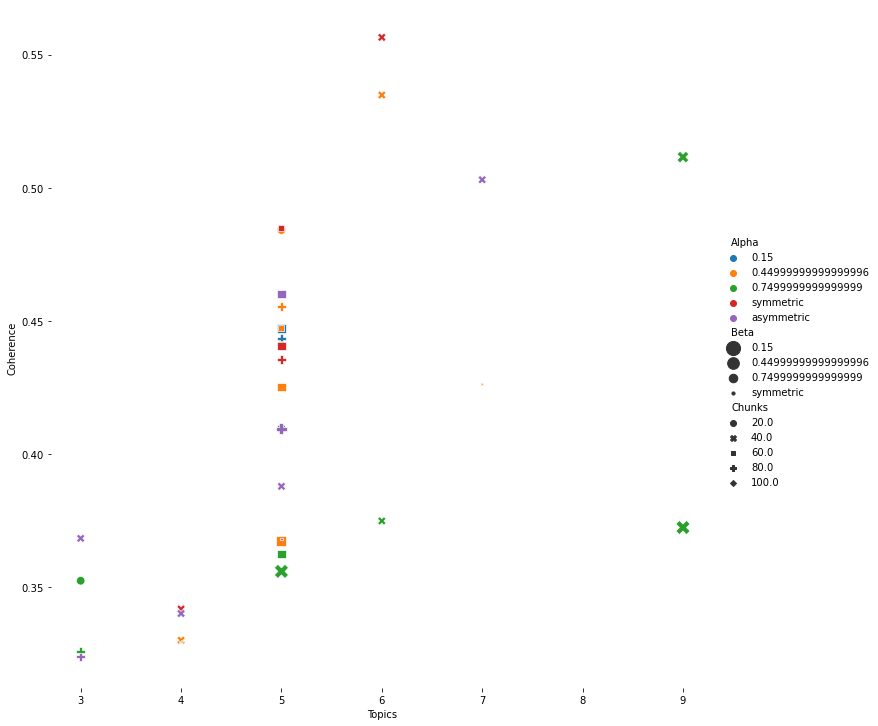

In [36]:
sns.color_palette("cubehelix", as_cmap=True)
g = sns.relplot(
    data=df,
    x="Topics", y="Coherence",
    hue="Alpha", size="Beta", sizes=(10, 200), style = 'Chunks', height = 10
)

#g.fig.set_size(figsize = (300,300))

#g.set( yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
g.savefig('../assets/tunning_results_5-11_topics.png')

In [37]:
view = df[df.Topics == 4]
view[view.Coherence > view.Coherence.max() - .05]

,Topics,Alpha,Beta,Chunks,Coherence
111,4,0.15,0.7499999999999999,40.0,0.342088
131,4,0.44999999999999996,0.7499999999999999,40.0,0.330197
158,4,0.7499999999999999,symmetric,80.0,0.329601
171,4,symmetric,0.7499999999999999,40.0,0.341913
191,4,asymmetric,0.7499999999999999,40.0,0.340220


In [38]:
view = df[df.Topics == 3]
view[view.Coherence > view.Coherence.max() - .05]

,Topics,Alpha,Beta,Chunks,Coherence
50,3,0.7499999999999999,0.7499999999999999,20.0,0.352522
53,3,0.7499999999999999,0.7499999999999999,80.0,0.325908
91,3,asymmetric,0.7499999999999999,40.0,0.368441
93,3,asymmetric,0.7499999999999999,80.0,0.323964


___
___
# 7. Inspecting Topic Models -  Chunk Size Matters
___
___

Our final selection is the result of an iterative process of tuning and interpretation. After several days of experimentation with parameter, stop word, and word gram combinations, we concluded that our final model could did not require the additional processing of word grams, and for many model combinations this decreased topic coherence. On the other hand, a good deal of our texts are short, and removing to many was also detrimental to our model performance.

The parameter which had the most significant impact on the coherence, relevance, and interpretability was the number of posts ( chunksize ) used to train the model on each iteration (pass). It appears that for our purposes of modeling short, disparate texts those models trained on smaller chunk sizes tend to result in more coherent results. With each pass, the texts included in each training chunk are randomly re-sampled. In order to take full advantage of this, we can invert the traditional chunk/pass proportions, training for many more passes.

It would appear that taking a narrower view of the corpus on each pass allows our model to ignore much of the noise and variance that come from disparate topics, user vocabularies, and post sizes. 

## EXP1

In [39]:
# experimental model 1
exp1_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12, 
                                           random_state=100,
                                           chunksize=60,
                                           passes=500,
                                           alpha=.35,
                                           eta='symmetric',
                                           )

pyLDAvis.enable_notebook() # lets us see visualizations in jupyter 
vis = pyLDAvis.gensim_models.prepare(exp1_model, corpus, id2word, mds='mmds', R= 25) # model / corpus / id2word dict / 
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.210630  0.321006       1        1  30.167091
9      0.039082  0.364691       2        1  21.275798
10     0.418193 -0.005001       3        1  19.686974
1     -0.363507  0.092532       4        1  11.442791
5      0.276698  0.228465       5        1   7.235762
0     -0.293332 -0.227445       6        1   5.362381
7     -0.030836 -0.271128       7        1   1.326499
8      0.131337 -0.224566       8        1   1.294596
2     -0.021865 -0.017328       9        1   0.898048
11     0.010394 -0.102396      10        1   0.525133
4      0.033906 -0.078062      11        1   0.448916
3      0.010558 -0.080766      12        1   0.336010, topic_info=              Term        Freq       Total Category  logprob  loglift
214           need  653.000000  653.000000  Default  25.0000  25.0000
152           help  645.000000  645.000000  Default  24.0000  24.0000
47             car  295.000000  295.000000  Default  23.0000  23.0000
100         donate  224.000000  224.000000  Default  22.0000  22.0000
156       homeless  441.000000  441.000000  Default  21.0000  21.0000
...            ...         ...         ...      ...      ...      ...
5267  prescription    0.030030    0.802177  Topic12  -9.0106   2.4106
6723       brewery    0.030041    0.812080  Topic12  -9.0102   2.3987
4417          hunt    0.030034    0.808384  Topic12  -9.0105   2.4031
7654       haircut    0.030023    0.811935  Topic12  -9.0108   2.3983
3384    specialize    0.030021    0.806819  Topic12  -9.0109   2.4046

[466 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1860      3  0.977881     access
6         2  0.698824    address
6         5  0.294242    address
5482      7  0.867673   adequate
1488     11  0.854678      adopt
...     ...       ...        ...
379       1  0.982922       yard
481       1  0.995428  yesterday
380       3  0.993009      young
1747      3  0.990858      youth
937       2  0.992501     zoning

[495 rows x 3 columns], R=25, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 11, 2, 6, 1, 8, 9, 3, 12, 5, 4])

## EXP2

In [40]:
# saved Model
exp2_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           chunksize=40,
                                           passes=500,
                                           alpha= 'asymmetric' ,
                                           eta='symmetric',
                                           #per_word_topics = True
                                           )

pyLDAvis.enable_notebook() # lets us see visualizations in jupyter 
vis = pyLDAvis.gensim_models.prepare(exp2_model, corpus, id2word, mds='mmds', R= 10) # model / corpus / id2word dict / 
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.082666 -0.305159       1        1  37.697587
1     -0.267826  0.214158       2        1  16.458900
0      0.109855  0.310645       3        1  15.147125
5      0.327862  0.024534       4        1  11.624568
4      0.180865 -0.243299       5        1  11.601644
2     -0.253787 -0.072973       6        1   6.496577
3     -0.014303  0.072094       7        1   0.973599, topic_info=            Term        Freq       Total Category  logprob  loglift
214         need  599.000000  599.000000  Default  10.0000  10.0000
156     homeless  408.000000  408.000000  Default   9.0000   9.0000
100       donate  208.000000  208.000000  Default   8.0000   8.0000
152         help  618.000000  618.000000  Default   7.0000   7.0000
47           car  270.000000  270.000000  Default   6.0000   6.0000
...          ...         ...         ...      ...      ...      ...
1262         bug    3.238962    4.083188   Topic7  -5.3936   4.4003
5203       skunk    2.998803    3.834123   Topic7  -5.4707   4.3862
5177  compliance    3.002672    3.847045   Topic7  -5.4694   4.3841
3309         cat    5.435899   14.799124   Topic7  -4.8759   3.6304
4549        fish    3.101205    6.479304   Topic7  -5.4371   3.8951

[139 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1860      4  0.980697   access
6         3  0.186911  address
6         4  0.098953  address
6         5  0.296859  address
6         6  0.417801  address
...     ...       ...      ...
375       1  0.418578     work
375       3  0.034223     work
375       4  0.455434     work
375       5  0.092140     work
937       3  0.989809   zoning

[204 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 1, 6, 5, 3, 4])

In [41]:
pyLDAvis.save_html(vis,'../assets/filter_2.0.exp.html')

## Eval : Coherence & Perplexity
___

In [42]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=exp1_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n EXP 1 Coherence Score: ', coherence_lda)

/home/t0ad/anaconda3/envs/work/lib/python3.8/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/home/t0ad/anaconda3/envs/work/lib/python3.8/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))



 EXP 1 Coherence Score:  nan


In [43]:
print('\n EXP 1 Perplexity: ', exp1_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


 EXP 1 Perplexity:  -8.682591469708642


In [44]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=exp2_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n EXP 2 Coherence Score: ', coherence_lda)


 EXP 2 Coherence Score:  0.45651368533594466


In [45]:
print('\n EXP 2 Perplexity: ', exp2_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


 EXP 2 Perplexity:  -7.937903413092047


___
___
# 8. Predictions
___
___

Set the last doc in the corpus as a test doc.

In order to get the predictions as singular values so that we can sort for the highest probability topic and assign predictions we need to train our models with per_word_topics = False.

otherwise our topics are returned in a tuple. Before we move on to visualizations we will need to re train our models with Per_word_topics = True

In [46]:
# function to sort the output probabilities
def Sort(sub_li):
    '''
    takes a sub list and sorts it 
    '''
    # sort based on the probablity value 
    sub_li.sort(key = lambda x: x[1])
    sub_li.reverse()
    return sub_li

In [47]:
def output_topics(corpus, model):
    preds = []
    for i ,doc in enumerate(corpus):
        # get topics for each doc
        test_doc = corpus[i]
        pred = model[test_doc]
        # sort prediction probablitities
        new_pred = Sort(pred)
        # return highest probability 
        #preds.append(new_pred)
        preds.append(new_pred[0][0])
    return preds

In [48]:
# if ATTRIBUTE ERROR : retrain model with per_word_topics = False

# get topics for each post
topics_0 = output_topics(corpus, exp1_model)
topics_1 = output_topics(corpus, exp2_model)

# assing topics to dataframe
posts_df['Filter_exp_1'] = [t for t in topics_0]
posts_df['Filter_exp_2'] = [t for t in topics_1]

posts_df.to_csv('../data/tfilter_posts.csv', index = False)

In [49]:
posts_df

,level_0,index,Unnamed: 0,post_id,author,location,date,post,lemma,comments,all_text,all_lemma,Filter_exp_1,Filter_exp_2
0,0,4,4,182941686,Beth Daoud,Congress Park,9 Apr,Squatters Camp. Am I the only one outraged by ...,outrage new squatter camp go 14th let allow ha...,"Everybody ""Wants to help"". But heaven forbid i...",Squatters Camp. Am I the only one outraged by ...,want help forbid show backyard want church exa...,10,1
1,2,7,7,183611885,Crystal Weaver,City Park,15 Apr,Fires around town. Someone just tried to set t...,fire town try set tree house vicinity fire gas...,Thanks for the warning..that’s disturbing\nI’m...,Fires around town. Someone just tried to set t...,thank warning disturbing glad neighbor injure ...,1,1
2,3,9,9,184321665,Bryn Creager,Congress Park,21 Apr,Brake in. On 4/19/21 at 2:05 AM a man broke in...,brake man break car park 6th steal garage door...,Looks like homeless goy on 14th and columbine\...,Brake in. On 4/19/21 at 2:05 AM a man broke in...,look homeless goy 14th sorry suck hope,6,1
3,4,10,10,184972043,Deb Christian,Hudson Street,27 Apr,It’s this whole thing of changing the housing ...,thing change housing code ask need,NaN,It’s this whole thing of changing the housing ...,NaN,9,0
4,5,11,11,185372613,Doug Bohm,Congress Park,1 May,Homeless tent ablaze burning car & property. L...,homeless tent ablaze burn car property night a...,Is this the same guy who panhandles on the sou...,Homeless tent ablaze burning car & property. L...,guy panhandle southwest intersection descripti...,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,926,1077,622,133490918,Barbara Acker,Lowry,2 Jan 20,donations for refugees? Where can I donate odd...,donation refugee donate odd household item ref...,NaN,donations for refugees? Where can I donate odd...,NaN,5,4
743,928,1079,624,171163993,Dyron Manning,Montbello,17 Dec,Lost bulldogs. My Bulldogs got out of back yar...,lose bulldog bulldog get yard area white brown...,NaN,Lost bulldogs. My Bulldogs got out of back yar...,NaN,6,6
744,929,1080,625,150824551,Lexy Beltran,Northeast Park Hill,6 Jun,Patio chairs. Any one selling patio chairs or ...,patio chair sell patio chair know,NaN,Patio chairs. Any one selling patio chairs or ...,NaN,6,6
745,930,1081,626,141292402,News,NaN,NaN,Denver sets sights on hundreds of respite room...,set sight hundred respite room people experien...,"""We recognize there are also people who are pr...",Denver sets sights on hundreds of respite room...,recognize people precariously house example ho...,10,5


___
___
# Save Model
___
___

In [50]:
exp1_model.save("../data/models/filter_1.fin.model")
exp2_model.save("../data/models/filter_2.fin.model")

# Load Model

In [51]:
new_model = gensim.models.ldamodel.LdaModel.load('../data/models/filter_2.fin.model')

In [52]:
new_model.show_topics()

[(0,
  '0.016*"live" + 0.014*"home" + 0.010*"change" + 0.010*"issue" + 0.010*"house" + 0.010*"want" + 0.008*"vote" + 0.007*"way" + 0.007*"allow" + 0.006*"number"'),
 (1,
  '0.020*"car" + 0.017*"police" + 0.011*"bike" + 0.010*"steal" + 0.010*"report" + 0.009*"happen" + 0.008*"house" + 0.007*"door" + 0.007*"come" + 0.007*"break"'),
 (2,
  '0.024*"homeless" + 0.013*"camp" + 0.012*"state" + 0.011*"support" + 0.010*"resident" + 0.009*"tent" + 0.009*"site" + 0.008*"address" + 0.008*"shelter" + 0.007*"right"'),
 (3,
  '0.009*"migraine" + 0.008*"field" + 0.008*"cat" + 0.007*"medication" + 0.007*"goose" + 0.007*"trap" + 0.007*"poop" + 0.005*"crab" + 0.005*"bug" + 0.004*"fish"'),
 (4,
  '0.026*"need" + 0.024*"donate" + 0.016*"help" + 0.016*"item" + 0.014*"homeless" + 0.014*"donation" + 0.013*"food" + 0.011*"shelter" + 0.011*"pick" + 0.011*"clothing"'),
 (5,
  '0.021*"need" + 0.020*"work" + 0.012*"service" + 0.012*"help" + 0.011*"program" + 0.011*"child" + 0.010*"provide" + 0.010*"family" + 0.008